In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget

import pandas as pd
import pickle

from simulation_framework import *

## JEE Dataset
### Preprocessing

In [3]:
result = pickle.load(open("./jee-pickles/jeeresult.pickle", "rb"))

jee_result = pd.DataFrame(result)
jee_result['math'] = pd.to_numeric(jee_result['math'])
jee_result['phys'] = pd.to_numeric(jee_result['phys'])
jee_result['chem'] = pd.to_numeric(jee_result['chem'])
jee_result['mark'] = pd.to_numeric(jee_result['mark'])

In [4]:
subject_score_general = list(jee_result['mark'][jee_result['category'] == 'GE'])
subject_score_not_general = list(jee_result['mark'][jee_result['category'] != 'GE'])

### Preferences (Major-Institute Pairs)

In [5]:
jee_preferences = pd.read_excel("IIT-JEE-2009.xlsx", sheet_name="updated_1000")
jee_preferences['Pair'] = jee_preferences.apply(lambda row: f"{row['Major']}, {row['Institute']}", axis = 1)

# Opening and closing ranks for each institute and major
pairs = list(jee_preferences['Pair'])

opening_ranks = list(jee_preferences['ge_opening'])
closing_ranks = list(jee_preferences['ge_closing'])

capacities = list(jee_preferences['Capacity']) # Sort by closing rank

# SUM OF CAPACITIES: 1659
# IN GROUP-WISE, NEED 658 BIAS AND 1001 NONBIAS
# TOP 5000 SCORES

In [ ]:
print(sum(capacities))

## Run simulation

phi: 0.0


/Users/andrewxu/Documents/Yale College/Vishnoi/Mitigating-Bias-in-Assignment/top_k_mallows/mallows_model.py:57: RuntimeWarning: divide by zero encountered in log
  return -np.log(phi)


phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24
phi: 0.28
phi: 0.32
phi: 0.36
phi: 0.4
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6
phi: 0.64
phi: 0.68
phi: 0.72
phi: 0.76
phi: 0.8
phi: 0.84
phi: 0.88
phi: 0.92
phi: 0.96


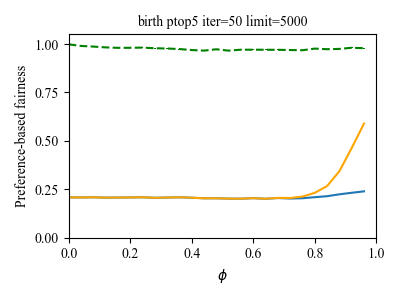

phi: 0.0
phi: 0.04
phi: 0.08
phi: 0.12
phi: 0.16
phi: 0.2
phi: 0.24
phi: 0.28
phi: 0.32
phi: 0.36
phi: 0.4
phi: 0.44
phi: 0.48
phi: 0.52
phi: 0.56
phi: 0.6
phi: 0.64
phi: 0.68
phi: 0.72
phi: 0.76
phi: 0.8
phi: 0.84
phi: 0.88
phi: 0.92
phi: 0.96


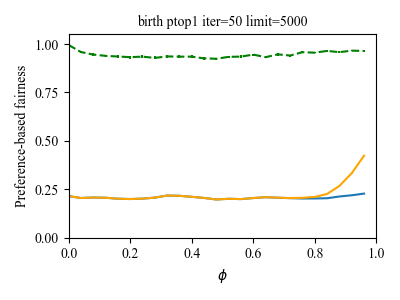

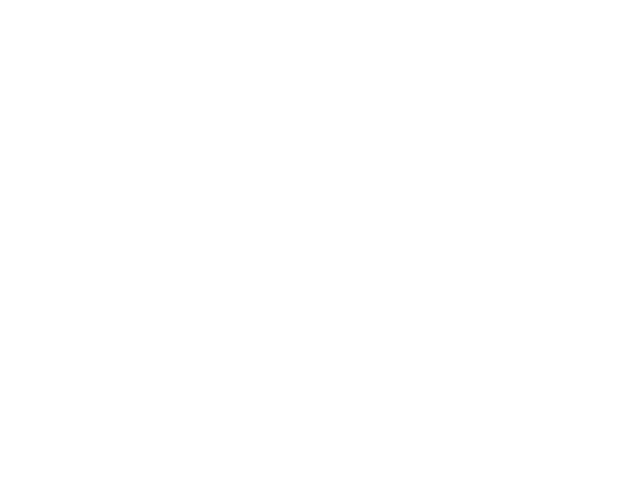

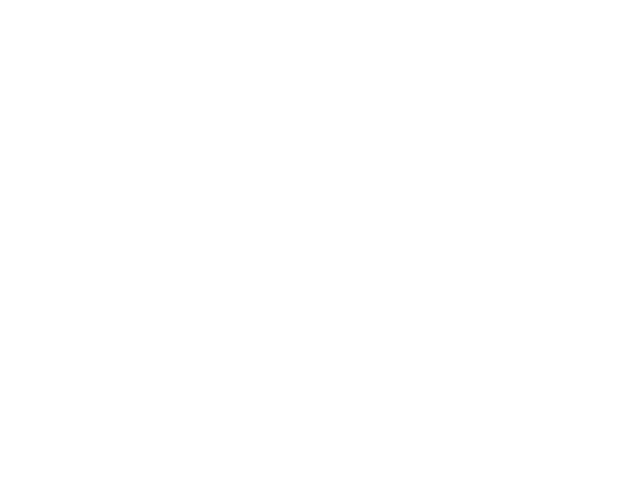

In [6]:
'''
    Setup. We use JEE 2009 data.
'''

# Gauss, beta = 0.25, p_top1

# NUMBER OF AGENTS -- total in dataset
n = len(jee_result['mark'])

# NUMBER OF INSTITUTIONS -- total in dataset
p = len(pairs)

# INSTITUTIONAL CAPACITIES -- 100
k = capacities

# TYPE OF TEST -- 'ptop1' or 'ptop5'
test_type = 'ptop5'

# PREFERENCE GENERATION -- is it always mallows?

# ITERATION COUNT
iter = 50

jee_simulation(n = n, p = p, utils_norm = subject_score_general, utils_bias = subject_score_not_general, k_inst = k, pref = range(len(k)), type = test_type, iter = iter, limit = 5000, attr = 'birth', saveImg=True)

jee_simulation(n = n, p = p, utils_norm = subject_score_general, utils_bias = subject_score_not_general, k_inst = k, pref = range(len(k)), type = 'ptop1', iter = iter, limit = 5000, attr = 'birth', saveImg=True)